<a href="https://colab.research.google.com/github/eunzzae/Study_DS/blob/main/12)_%EC%8B%A0%EC%9A%A9%EC%A0%90%EC%88%98_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 신용점수 예측
>**목차**

* 문제상황 및 데이터 살펴보기  
* 문제해결 프로세스 정의  
1) 신용점수 분포 파악  
2) 신용점수 영향인자 분석  
3) ML 활용 신용점수 예측

In [1]:
# ▶ Warnings 제거
import warnings
warnings.filterwarnings('ignore')

# ▶ Google drive mount or 폴더 클릭 후 구글드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

# # ▶ 경로 설정 (※ Colab을 활성화시켰다면 보통 Colab Notebooks 폴더가 자동 생성)
# import os
# os.chdir('/content/drive/MyDrive/Colab Notebooks/part3_lecture_fastcampus/chapter12')
# # '/content/drive/MyDrive/Colab Notebooks/ ← 여기 경로까지는 본인의 경로 입력, part3_lecture_fastcampus/chapter12' ← 변경X
# os.getcwd()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 문제상황 및 데이터 살펴보기
---
> **시나리오**

```
A사는 매 년 다른 신용평가사의 신용점수 Data를 구입하여 사용하고 있다. 해당 Data를 사용함에 따라 발생하는 라이센스 비용이 만만치 않다.  
따라서 A사는 이번 년도 신규프로젝트의 일환으로 자사의 Data를 활용하여 신용점수를 예측하는 모형을 만들고자 한다.

```  

> **데이터 살펴보기**

* 신용점수와 고객 프로필 정보
* 데이터 명세

|Loan ID|Customer ID|Loan Status|Current Loan Amount|Term|Credit Score|
|:---:|:---:|:---:|:---:|:---:|:---:|
|대출ID|고객ID|대출상태|현재대출잔액|대출기간|신용점수|
|Annual Income|Years in current job|Home Ownership|Purpose|Monthly Debt|Years of Credit History|
|연수입|직업년차|자가여부|대출목적|월상환금액|신용기록|
|Months since last delinquent|Number of Open Accounts|Number of Credit Problems|Current Credit Balance|Maximum Open Credit|Bankruptcies|  
|마지막 연체이후 개월|유효계좌수|신용불량건수|현재신용한도|최대신용한도|파산여부|
|Tax Liens|
|세금유치권|

In [2]:
# Data read
import pandas as pd
bath = '/content/drive/MyDrive/[STUDY] 데이터사이언스/데이터분석/data/chapter12_신용점수 예측/'
df = pd.read_csv(bath + 'chapter12_credit_score.csv')
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


## 문제해결 프로세스 정의
---

>**문제정의**

```
- 신용평가 모델 부재로 인해 발생하는 과다한 라이센스 비용
```

>**기대효과**

```
- 자사 신용평가 모델을 활용 라이센스 비용 절감
```

>**해결방안**

```
- 자사 Data 활용 신용평가 모델 생성 및 활용
- Session 1
  - Data 전처리 및 distplot을 활용한 신용점수 분포 확인
- Session 2
  - Numeric, categorical 변수별 평균 신용점수 확인
- Session 3
  - ML 알고리즘을 활용하여 신용점수 예측 모델 생성
```

>**성과측정**

```
- 매년 라이센스 비용 절감 금액
```

>**현업적용**

```
- 매 월 model에 input하기 위한 Data mart 생성
- 매 월 model을 활용하여 고객의 신용점수 산출
- 모델 활용 신용점수와 외부업체 신용점수와의 정합성 확인
- 정합성 확인 후 자사 모델 활용 전환 논의
```

## 신용점수 분포 파악


### Data 전처리

In [3]:
# Data shape
# 100,514 row, 19 col 구성
print('df', df.shape)

df (100514, 19)


In [4]:
# Data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

In [5]:
# Null 확인
df.isnull().sum()

Loan ID                           514
Customer ID                       514
Loan Status                       514
Current Loan Amount               514
Term                              514
Credit Score                    19668
Annual Income                   19668
Years in current job             4736
Home Ownership                    514
Purpose                           514
Monthly Debt                      514
Years of Credit History           514
Months since last delinquent    53655
Number of Open Accounts           514
Number of Credit Problems         514
Current Credit Balance            514
Maximum Open Credit               516
Bankruptcies                      718
Tax Liens                         524
dtype: int64

In [6]:
# Target data는 신용점수(Credit score)가 없는 데이터는 활용할 수 없으므로 제거
df=df.dropna(subset=['Credit Score','Years in current job', 'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'])
df['Months since last delinquent'].fillna(0.0, inplace=True)

In [7]:
# 재확인
df.isnull().sum()

Loan ID                         0
Customer ID                     0
Loan Status                     0
Current Loan Amount             0
Term                            0
Credit Score                    0
Annual Income                   0
Years in current job            0
Home Ownership                  0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
dtype: int64

In [8]:
# Outlier 확인
df.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,7.727100e+04,77271.000000,7.727100e+04,77271.000000,77271.000000,77271.000000,77271.000000,77271.000000,7.727100e+04,7.727100e+04,77271.000000,77271.000000
mean,1.454562e+07,1071.759392,1.399186e+06,18755.666828,17.983421,16.427780,11.201020,0.164641,2.975654e+05,7.395510e+05,0.114299,0.029196
std,3.486935e+07,1466.273187,1.094465e+06,12292.178511,6.796231,23.001615,5.037004,0.481352,3.845754e+05,7.038667e+06,0.347270,0.262642
min,1.542200e+04,585.000000,7.662700e+04,0.000000,3.700000,0.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.931490e+05,705.000000,8.625050e+05,10478.500000,13.400000,0.000000,8.000000,0.000000,1.143515e+05,2.746260e+05,0.000000,0.000000
50%,3.269640e+05,724.000000,1.202263e+06,16475.280000,16.800000,0.000000,10.000000,0.000000,2.127240e+05,4.697000e+05,0.000000,0.000000
75%,5.530800e+05,741.000000,1.677339e+06,24302.330000,21.500000,30.000000,14.000000,0.000000,3.712695e+05,7.839040e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.000000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


In [9]:
# 고객 ID 기준 중복 확인
df[df['Customer ID']=='981165ec-3274-42f5-a3b4-d104041a9ca9']

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,0.0,6.0,1.0,228190.0,416746.0,1.0,0.0
38854,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,0.0,6.0,1.0,228190.0,416746.0,1.0,0.0


In [10]:
# 고객 ID 기준 중복 제거
df.drop_duplicates(['Customer ID'], keep = 'first', inplace=True)

In [11]:
df.shape

(64055, 19)

### 신용점수 분포 확인
---

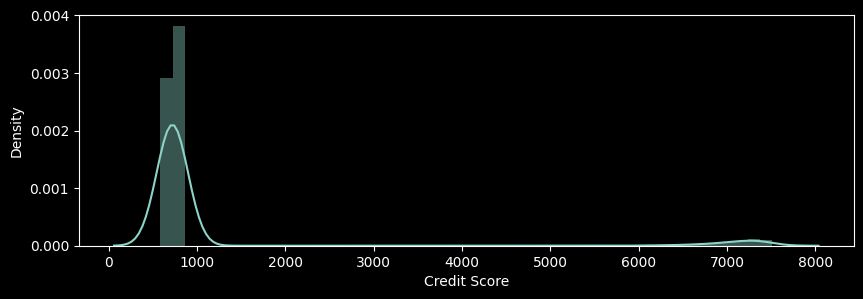

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['dark_background'])

sns.distplot(df['Credit Score'])
plt.gcf().set_size_inches(10, 3)

In [13]:
df['Credit Score'].describe()

count    64055.000000
mean      1148.426196
std       1599.706075
min        585.000000
25%        710.000000
50%        730.000000
75%        743.000000
max       7510.000000
Name: Credit Score, dtype: float64

In [14]:
# 신용점수가 1,000점 만점으로 가정했을 때, 그 이상의 데이터는 오류가 있는 데이터일 확률이 높으므로, 제거함.
df = df[df['Credit Score']<=1000]
df.shape

(59761, 19)

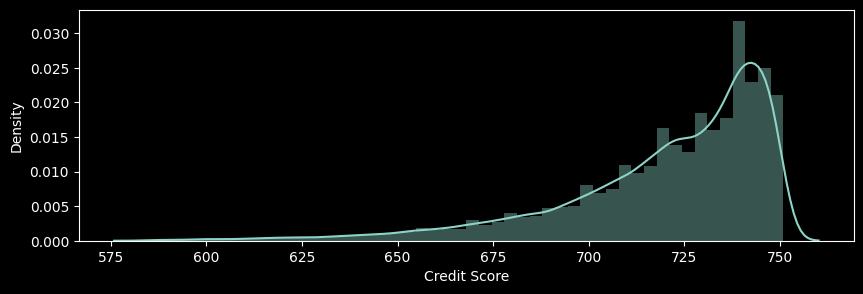

In [15]:
# 전처리 후 데이터 분포 확인
sns.distplot(df['Credit Score'])
plt.gcf().set_size_inches(10,3)

## Session 2
## 신용점수 영향인자 분석

In [16]:
df['Loan ID'].dtypes

dtype('O')

In [17]:
# numeric, categorical value 나누기
numeric_list=[]
categorical_list=[]

for i in df.columns :
  if df[i].dtypes == 'O' :
    categorical_list.append(i)
  else :
    numeric_list.append(i)

print("categorical_list :", categorical_list)
print("numeric_list :", numeric_list)

categorical_list : ['Loan ID', 'Customer ID', 'Loan Status', 'Term', 'Years in current job', 'Home Ownership', 'Purpose']
numeric_list : ['Current Loan Amount', 'Credit Score', 'Annual Income', 'Monthly Debt', 'Years of Credit History', 'Months since last delinquent', 'Number of Open Accounts', 'Number of Credit Problems', 'Current Credit Balance', 'Maximum Open Credit', 'Bankruptcies', 'Tax Liens']


### Numeric 변수
---

In [18]:
df[numeric_list].head(3)

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,445412.0,709.0,1167493.0,5214.74,17.2,0.0,6.0,1.0,228190.0,416746.0,1.0,0.0
2,99999999.0,741.0,2231892.0,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,347666.0,721.0,806949.0,8741.90,12.0,0.0,9.0,0.0,256329.0,386958.0,0.0,0.0


Pearson correlation coefficient: 0.08182908654881718


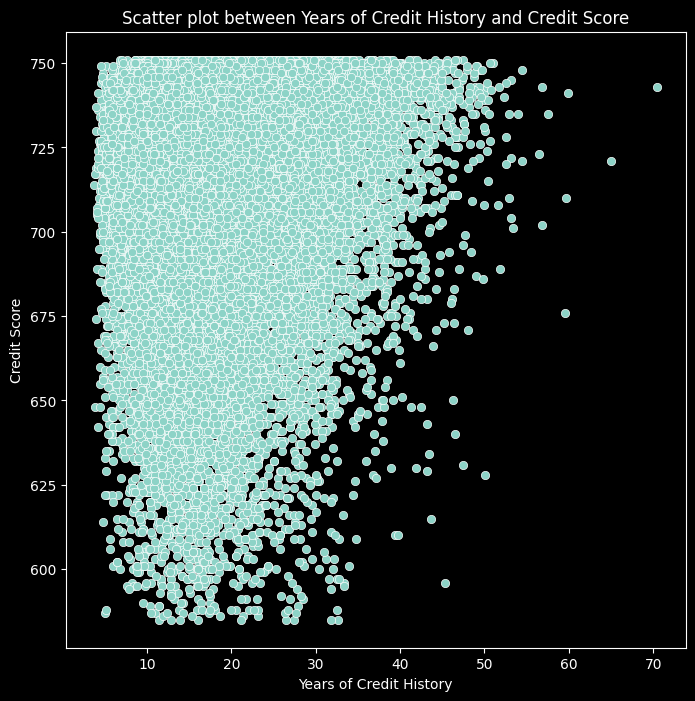

In [19]:
# Years of Credit History와 신용점수와의 상관계수 확인
import scipy.stats as stats

val = 'Years of Credit History'

sns.scatterplot(x=df[val], y=df['Credit Score'])
plt.xlabel(val)
plt.ylabel('Credit Score')
plt.title('Scatter plot between Years of Credit History and Credit Score')

corr, _ = stats.pearsonr(df[val], df['Credit Score'])
print("Pearson correlation coefficient:", corr)

plt.gcf().set_size_inches(8,8)
plt.show()

<Axes: xlabel='Years of Credit History', ylabel='Density'>

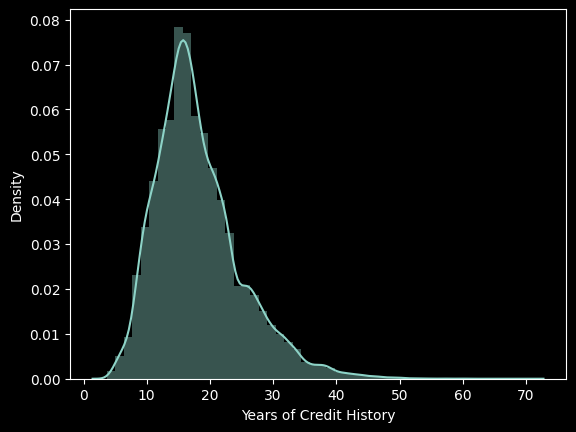

In [20]:
sns.distplot(df[val])

In [21]:
# 구간화
import numpy as np
df['gp'] = np.where (df[val] <= 10, 1,
                           np.where(df[val] <= 20, 2, 3))

df[[val,'gp']]

,Years of Credit History,gp
0,17.2,2
2,14.9,2
3,12.0,2
6,19.6,2
8,22.6,3
...,...,...
99990,20.1,3
99994,17.4,2
99996,9.4,1
99997,18.8,2


In [22]:
df.groupby('gp')['Credit Score'].mean()

gp
1    714.098887
2    719.841905
3    722.612636
Name: Credit Score, dtype: float64

### Categorical 변수
---

In [23]:
df[categorical_list].iloc[:, 2:].head(3)

,Loan Status,Term,Years in current job,Home Ownership,Purpose
0,Fully Paid,Short Term,8 years,Home Mortgage,Home Improvements
2,Fully Paid,Short Term,8 years,Own Home,Debt Consolidation
3,Fully Paid,Long Term,3 years,Own Home,Debt Consolidation


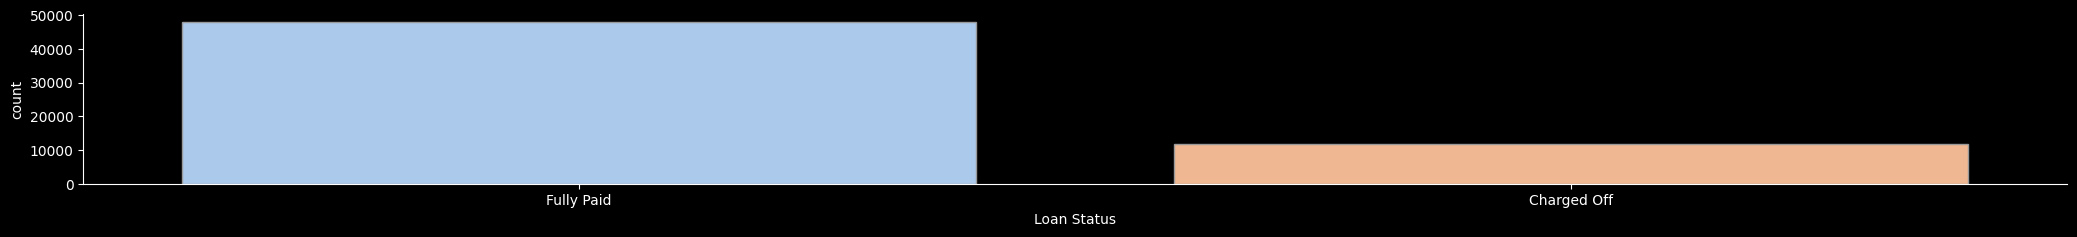

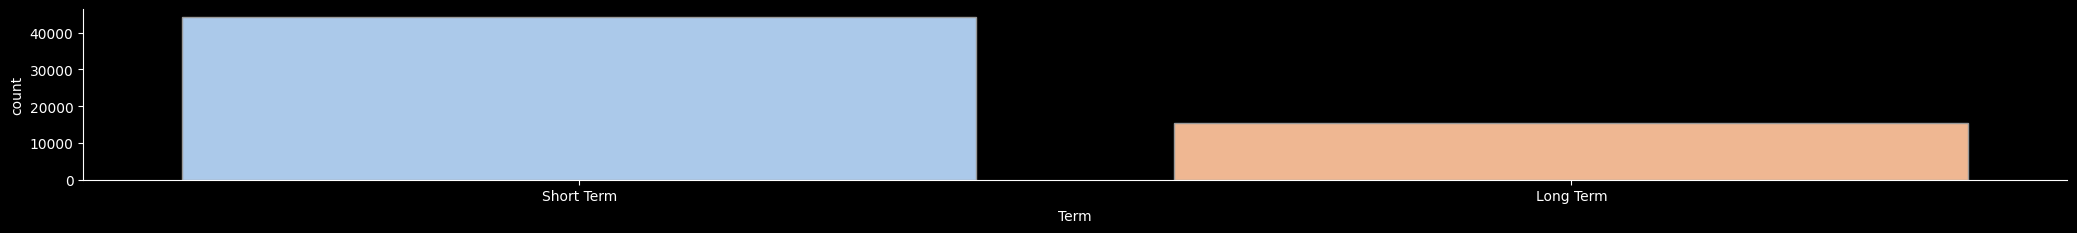

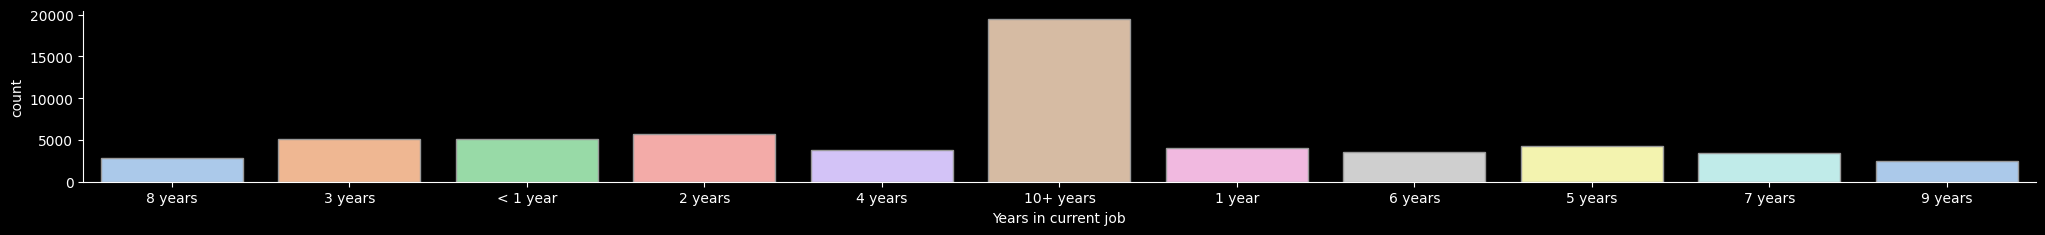

In [24]:
# 범주형 변수에 대해 catplot
sns.catplot(x='Loan Status', kind='count', palette='pastel', edgecolor='.6', data=df);
plt.gcf().set_size_inches(25,2)

sns.catplot(x='Term', kind='count', palette='pastel', edgecolor='.6', data=df)
plt.gcf().set_size_inches(25,2)

sns.catplot(x='Years in current job', kind='count', palette='pastel', edgecolor='.6', data=df)
plt.gcf().set_size_inches(25,2)

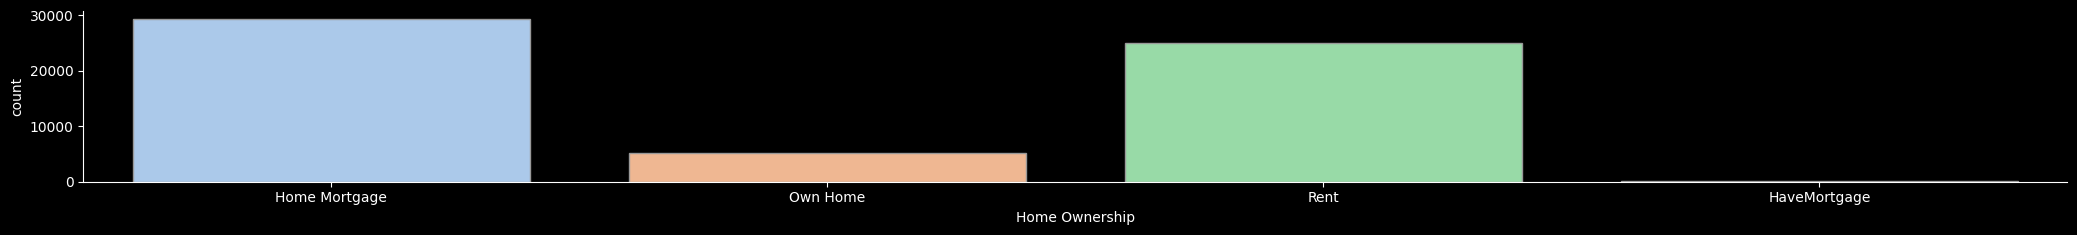

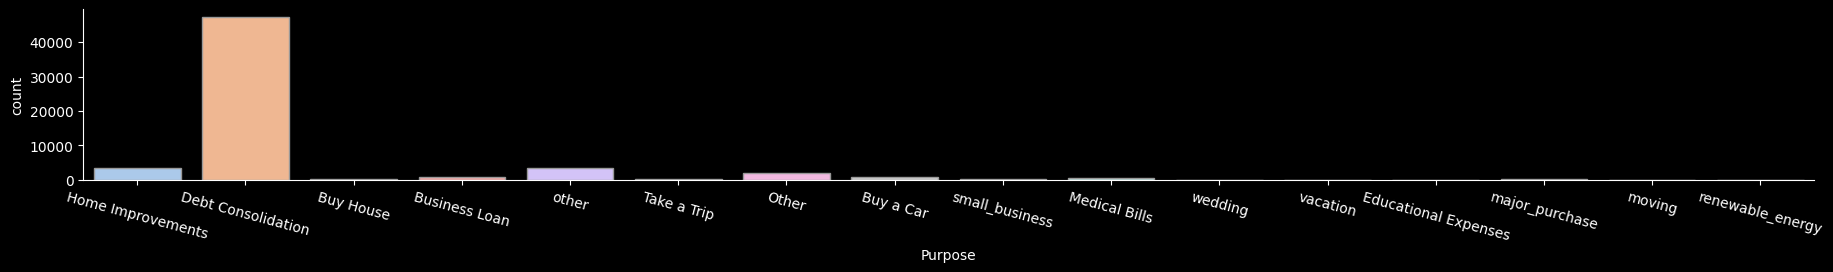

In [25]:
sns.catplot(x='Home Ownership', kind='count', palette='pastel', edgecolor='.6', data=df)
plt.gcf().set_size_inches(25,2)

sns.catplot(x='Purpose', kind='count', palette='pastel', edgecolor='.6', data=df)
plt.xticks(rotation=-15)
plt.gcf().set_size_inches(25,2)

In [26]:
# 범주형 변수 list
print(categorical_list)

['Loan ID', 'Customer ID', 'Loan Status', 'Term', 'Years in current job', 'Home Ownership', 'Purpose']


In [27]:
# Loan ID와 Customer ID는 구분자이기 때문에 제거
categorical_list[2:]

['Loan Status', 'Term', 'Years in current job', 'Home Ownership', 'Purpose']

In [28]:
for i in categorical_list[2:]:
  print(df.groupby(i)['Credit Score'].mean().sort_values(ascending=False))
  print('')
  print('-------------------------------')

Loan Status
Fully Paid     722.800443
Charged Off    709.825839
Name: Credit Score, dtype: float64

-------------------------------
Term
Short Term    728.125189
Long Term     697.727308
Name: Credit Score, dtype: float64

-------------------------------
Years in current job
1 year       721.161307
< 1 year     720.933871
2 years      720.796908
3 years      720.536819
4 years      720.517060
8 years      720.314365
6 years      720.281515
5 years      720.247259
7 years      719.727642
9 years      719.636364
10+ years    719.634629
Name: Credit Score, dtype: float64

-------------------------------
Home Ownership
Home Mortgage    721.693731
HaveMortgage     720.576923
Own Home         719.113319
Rent             718.706197
Name: Credit Score, dtype: float64

-------------------------------
Purpose
Buy a Car               728.040201
major_purchase          725.208333
Educational Expenses    724.844828
Home Improvements       721.773272
Debt Consolidation      721.249126
Other         

## Session 3
## ML활용 신용점수 예측

### 모델링을 위한 데이터 준비
---
* X, Y 구분  
* train, test set 분할

In [29]:
df.head(3)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,gp
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,0.0,6.0,1.0,228190.0,416746.0,1.0,0.0,2
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0,2
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,0.0,9.0,0.0,256329.0,386958.0,0.0,0.0,2


In [30]:
# 모델링을 학습하기 위한 X와 Y 구분
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

X=df.drop(['Loan ID', 'Customer ID', 'gp', 'Credit Score'], axis=1)
Y=df['Credit Score']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(41832, 16)
(41832,)
(17929, 16)
(17929,)


In [31]:
print(categorical_list)

['Loan ID', 'Customer ID', 'Loan Status', 'Term', 'Years in current job', 'Home Ownership', 'Purpose']


In [32]:
# 사용하지 않을 list는 사전 제거
categorical_list.remove('Loan ID')
categorical_list.remove('Customer ID')

In [33]:
print(categorical_list)

['Loan Status', 'Term', 'Years in current job', 'Home Ownership', 'Purpose']


In [34]:
from sklearn.preprocessing import LabelEncoder

for col in categorical_list:
    print(col, " - completed")
    le = LabelEncoder()
    le.fit(list(x_train[col].values) + list(x_test[col].values))
    x_train[col] = le.transform(x_train[col])
    x_test[col] = le.transform(x_test[col])

Loan Status  - completed
Term  - completed
Years in current job  - completed
Home Ownership  - completed
Purpose  - completed


In [35]:
x_train[categorical_list].head(3)

,Loan Status,Term,Years in current job,Home Ownership,Purpose
63776,1,1,1,1,3
7024,1,1,9,3,3
58221,0,1,5,1,3


In [36]:
x_test[categorical_list].head(3)

,Loan Status,Term,Years in current job,Home Ownership,Purpose
30618,1,0,4,3,3
44773,1,1,2,1,3
61724,1,1,2,1,3


### 모델 학습 및 평가
---

In [37]:
# 학습
rfr = RandomForestClassifier(n_estimators=100, max_depth=12)
rfr.fit(x_train, y_train)

RandomForestClassifier(max_depth=12)

In [38]:
# 예측
# 예측은 학습에 사용된 Data와 Test Data 모두 예측하고 평가(과적합 여부 판별)
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score
y_pred_train = rfr.predict(x_train)
y_pred_test = rfr.predict(x_test)


mae_train = mean_absolute_error(y_train, y_pred_train)
print('mae_train(mae): ', mae_train)
r2_train = r2_score(y_train, y_pred_train)
print('r2_score(r2): ', r2_train)
print('')
mae_test = mean_absolute_error(y_test, y_pred_test)
print('mae_test(mae): ', mae_test)
r2_test = r2_score(y_test, y_pred_test)
print('r2_score(r2): ', r2_test)

mae_train(mae):  11.420826161790018
r2_score(r2):  0.3413053416011418

mae_test(mae):  18.955714206034916
r2_score(r2):  -0.0809168167084029


In [39]:
# 예측값과 실제값 비교
result = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred_test})
result['diff'] = result['Real Values'] - result['Predicted Values']
result

,Real Values,Predicted Values,diff
30618,672.0,710.0,-38.0
44773,748.0,740.0,8.0
61724,746.0,741.0,5.0
47615,744.0,740.0,4.0
978,683.0,687.0,-4.0
...,...,...,...
2014,734.0,718.0,16.0
43848,750.0,747.0,3.0
37718,686.0,683.0,3.0
51106,672.0,720.0,-48.0


In [40]:
result.sort_values(by=['diff'], ascending=False)

,Real Values,Predicted Values,diff
18547,723.0,588.0,135.0
13732,720.0,621.0,99.0
23920,735.0,636.0,99.0
18509,730.0,637.0,93.0
68349,740.0,649.0,91.0
...,...,...,...
18461,599.0,740.0,-141.0
64499,597.0,746.0,-149.0
6334,589.0,743.0,-154.0
64223,587.0,743.0,-156.0


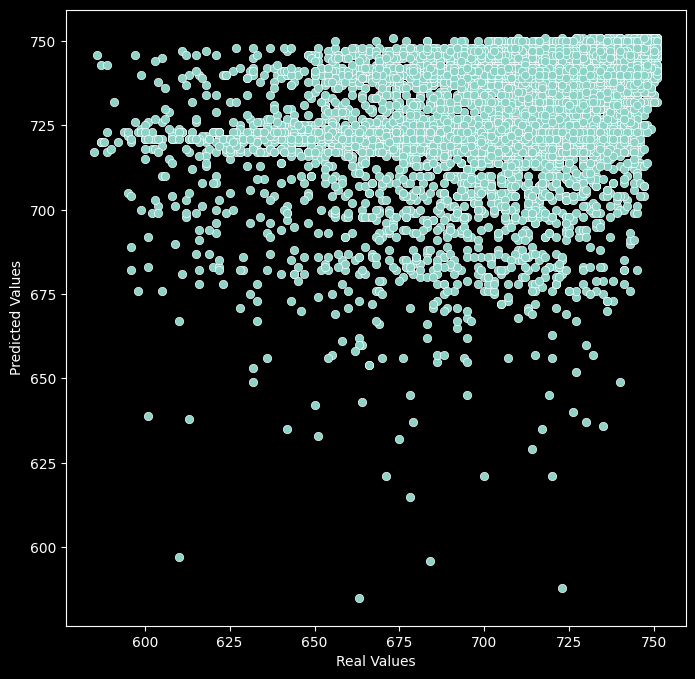

In [41]:
# 신용점수가 낮을수록 Fitting이 잘 안되는 경향성이 보임
sns.scatterplot(x=result['Real Values'], y=result['Predicted Values'])
plt.gcf().set_size_inches(8,8)

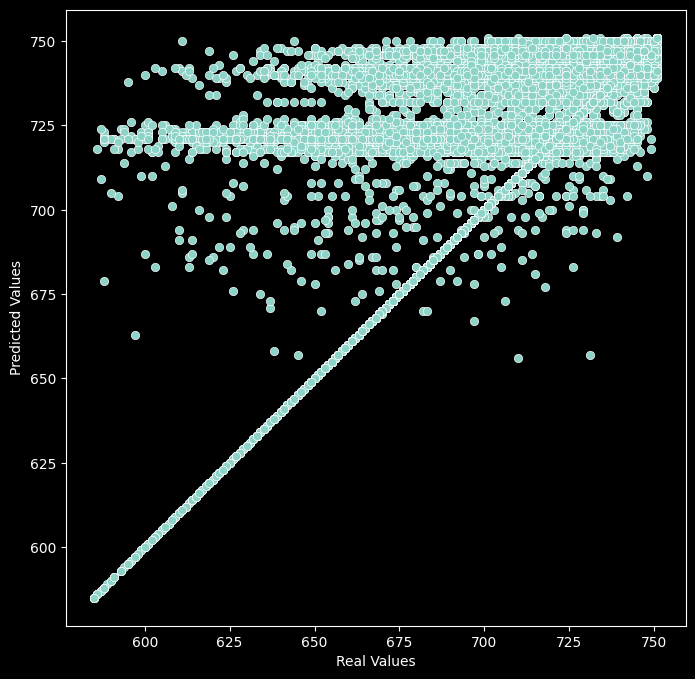

In [42]:
# Train set에서는 잘 Fitting되어 있음
result = pd.DataFrame({'Real Values' : y_train, 'Predicted Values': y_pred_train})
sns.scatterplot(x=result['Real Values'], y=result['Predicted Values'])
plt.gcf().set_size_inches(8,8)

### 중요 변수 파악

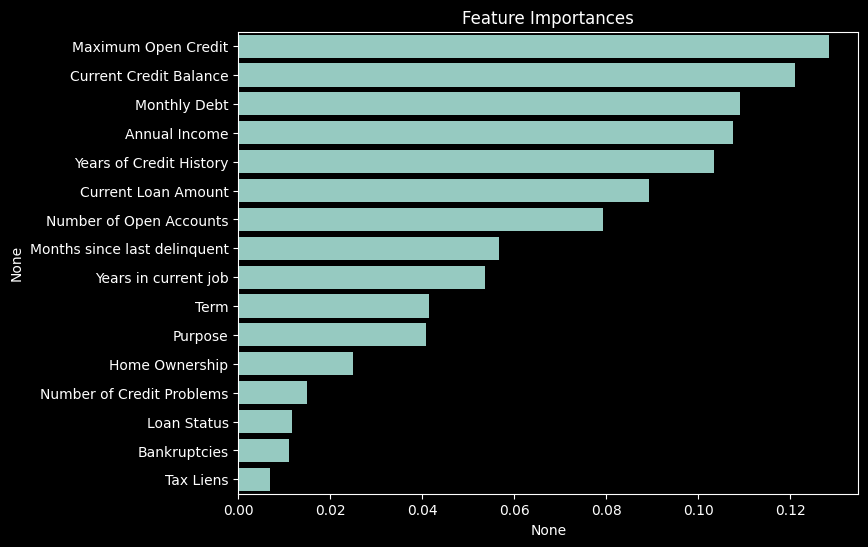

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use(['dark_background'])

ftr_importances_values = rfr.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = x_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

<Axes: xlabel='Current Credit Balance', ylabel='Density'>

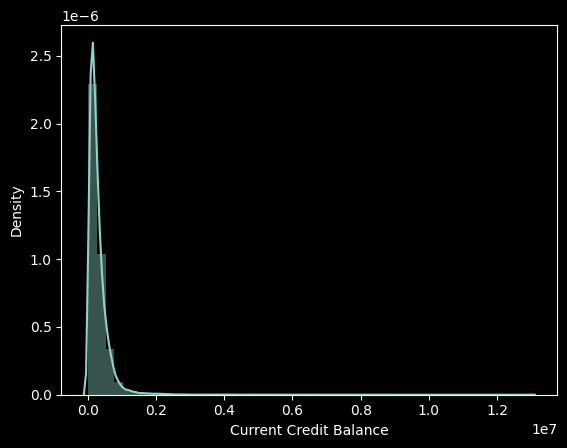

In [44]:
sns.distplot(df['Current Credit Balance'])

In [45]:
df['Current Credit Balance'].describe()

count    5.976100e+04
mean     2.964889e+05
std      3.616377e+05
min      0.000000e+00
25%      1.143040e+05
50%      2.121540e+05
75%      3.702150e+05
max      1.298696e+07
Name: Current Credit Balance, dtype: float64

In [46]:
# 구간화
val = 'Current Credit Balance'

import numpy as np
df['gp'] = np.where(df[val] <=1143042, 1,
                    np.where(df[val]<=370215, 2, 3))
df[[val, 'gp']]

,Current Credit Balance,gp
0,228190.0,1
2,297996.0,1
3,256329.0,1
6,122170.0,1
8,437171.0,1
...,...,...
99990,37392.0,1
99994,456.0,1
99996,153045.0,1
99997,109554.0,1


In [48]:
# 중요변수 'Current Credit Balance' 탐색
df.groupby('gp')['Credit Score'].mean().sort_values(ascending=False)

gp
1    720.218991
3    719.886695
Name: Credit Score, dtype: float64

In [49]:
import pickle
# 모델 저장
saved_model = pickle.dumps(rfr)

# 모델 Read
rfr_from_pickle = pickle.loads(saved_model)